I am going to show how to make a grouped bar chart and a 100% stacked bar chart.  To start I am going to load in a dataset.  I want to look at the relationship between number of customer service calls vs whether the customer churned or not. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [17]:
df.groupby('customer service calls')['churn'].value_counts()

customer service calls  churn
0                       False     605
                        True       92
1                       False    1059
                        True      122
2                       False     672
                        True       87
3                       False     385
                        True       44
4                       False      90
                        True       76
5                       True       40
                        False      26
6                       True       14
                        False       8
7                       True        5
                        False       4
8                       False       1
                        True        1
9                       True        2
Name: churn, dtype: int64

This is what I want to visualize.  I am first going to use a grouped bar chart. 

## Grouped Bar Chart 

#### Step 1: Make the above into a dataframe 

In [27]:
# get value counts for non_churn calls 
non_churn = df[df['churn'] == False]['customer service calls'].value_counts().sort_index()
# rename to non_churn 
non_churn.rename('Non_Churn', inplace = True)
# get value counts for churn calls 
churn = df[df['churn'] == True]['customer service calls'].value_counts().sort_index()
# rename to churn
churn.rename('Churn', inplace = True)

# combine the 2 pandas series into a dataframe
churn_df = pd.concat([non_churn, churn], axis = 1)
churn_df

,Non_Churn,Churn
0,605.0,92
1,1059.0,122
2,672.0,87
3,385.0,44
4,90.0,76
5,26.0,40
6,8.0,14
7,4.0,5
8,1.0,1
9,NaN,2


I am going to fill in the missing values with 0, this is because the data is not missing rather no calls were made 

In [28]:
churn_df.fillna(0, inplace = True)
churn_df

,Non_Churn,Churn
0,605.0,92
1,1059.0,122
2,672.0,87
3,385.0,44
4,90.0,76
5,26.0,40
6,8.0,14
7,4.0,5
8,1.0,1
9,0.0,2


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

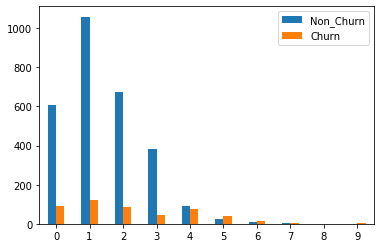

In [31]:
churn_df.plot(kind = 'bar')
plt.xticks(rotation = 0)

#### Step 2: Make Plot 

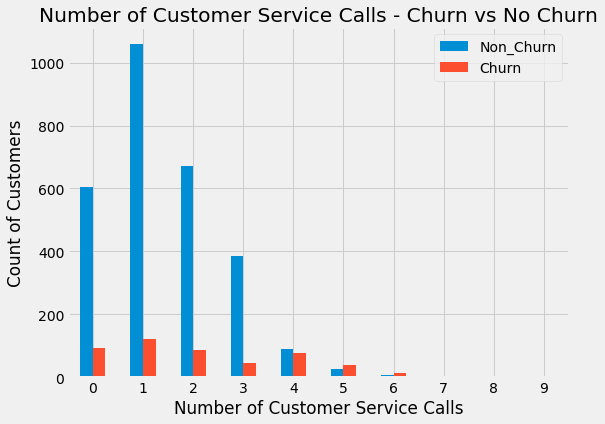

In [37]:
with plt.style.context('fivethirtyeight'):
    churn_df.plot(kind = 'bar', figsize = (8, 6))
    plt.xticks(rotation = 0)
    plt.xlabel('Number of Customer Service Calls')
    plt.ylabel('Count of Customers')
    plt.title('Number of Customer Service Calls - Churn vs No Churn')

#### Step 3: Interpret the Graph 

We see that when the number of customer service calls is between 0 and 3 there is a really high number of customers that did not churn.  However, after 3 customer service calls the number of instances is very small so it is hard to determine the impact after that.  

I am now going to show the same information with a 100% stacked bar chart.  Note I'll be using this [great tutorial](https://python-graph-gallery.com/13-percent-stacked-barplot/) 

## 100% Stacked Bar Chart 

#### Step 1: Make Plot 

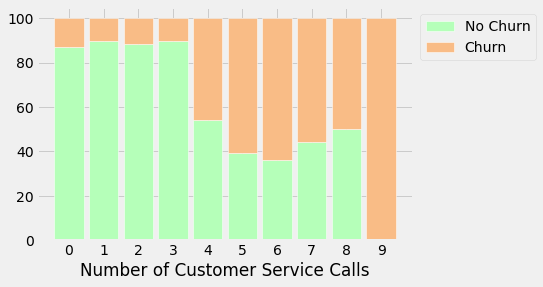

In [50]:
# From raw value to percentage
totals = [i+j for i,j in zip(churn_df['Non_Churn'], churn_df['Churn'])]
greenBars = [i / j * 100 for i,j in zip(churn_df['Non_Churn'], totals)]
orangeBars = [i / j * 100 for i,j in zip(churn_df['Churn'], totals)]

with plt.style.context('fivethirtyeight'):
    # plot
    barWidth = 0.85
    names = churn_df.index
    # Create green Bars
    plt.bar(range(len(churn_df)), greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label = 'No Churn')
    # Create orange Bars
    plt.bar(range(len(churn_df)), orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, 
           label = 'Churn')

    # Custom x axis
    plt.xticks(range(len(churn_df)), names)
    plt.xlabel("Number of Customer Service Calls")

    # Add a legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#### Step 2: Interpret Graph 

In this plot we see that the percent of customers that churn after 4 customer service calls increases significantly.  My recommendation would be to prioritize customers that have made 2-3 customer service calls before they reach that 4 customer service calls threshold! 